### Evaluasi untuk Unranked Retrieval Set

In [1]:
def tokenisasi(text):
    tokens = text.split(" ")
    return tokens

def stemming(text):
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    # create stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    # stemming process
    output = stemmer.stem(text)
    return output

def stemming_sentence(text):
    output = ""
    for token in tokenisasi(text):
        output = output + stemming(token) + " "
    return output[:-1]

doc_dict_raw = {}
doc_dict_raw['doc1'] = "pengembangan sistem informasi penjadwalan"
doc_dict_raw['doc2'] = "pengembangan model analisis sentimen berita"
doc_dict_raw['doc3'] = "analisis sistem input output"
doc_dict_raw['doc4'] = "pengembangan sistem informasi akademik universitas"
doc_dict_raw['doc5'] = "pengembangan sistem cari berita ekonomi"
doc_dict_raw['doc6'] = "analisis sistem neraca nasional"
doc_dict_raw['doc7'] = "pengembangan sistem informasi layanan statistik"
doc_dict_raw['doc8'] = "pengembangan sistem pencarian skripsi di universitas"
doc_dict_raw['doc9'] = "analisis sentimen publik terhadap pemerintah"
doc_dict_raw['doc10'] = "pengembangan model klasifikasi sentimen berita"

doc_dict = {}
for doc_id,doc in doc_dict_raw.items():
    doc_dict[doc_id] = stemming_sentence(doc)

print(doc_dict)

{'doc1': 'kembang sistem informasi jadwal', 'doc2': 'kembang model analisis sentimen berita', 'doc3': 'analisis sistem input output', 'doc4': 'kembang sistem informasi akademik universitas', 'doc5': 'kembang sistem cari berita ekonomi', 'doc6': 'analisis sistem neraca nasional', 'doc7': 'kembang sistem informasi layan statistik', 'doc8': 'kembang sistem cari skripsi di universitas', 'doc9': 'analisis sentimen publik hadap perintah', 'doc10': 'kembang model klasifikasi sentimen berita'}


In [2]:
vocab = []
inverted_index = {}
for doc_id,doc in doc_dict.items():
    for token in tokenisasi(doc):
        print(token)
        if token not in vocab:
            vocab.append(token)
            inverted_index[token] = []
        if token in inverted_index:
            if doc_id not in inverted_index[token]:
                inverted_index[token].append(doc_id)
print(vocab)
print(inverted_index)


kembang
sistem
informasi
jadwal
kembang
model
analisis
sentimen
berita
analisis
sistem
input
output
kembang
sistem
informasi
akademik
universitas
kembang
sistem
cari
berita
ekonomi
analisis
sistem
neraca
nasional
kembang
sistem
informasi
layan
statistik
kembang
sistem
cari
skripsi
di
universitas
analisis
sentimen
publik
hadap
perintah
kembang
model
klasifikasi
sentimen
berita
['kembang', 'sistem', 'informasi', 'jadwal', 'model', 'analisis', 'sentimen', 'berita', 'input', 'output', 'akademik', 'universitas', 'cari', 'ekonomi', 'neraca', 'nasional', 'layan', 'statistik', 'skripsi', 'di', 'publik', 'hadap', 'perintah', 'klasifikasi']
{'kembang': ['doc1', 'doc2', 'doc4', 'doc5', 'doc7', 'doc8', 'doc10'], 'sistem': ['doc1', 'doc3', 'doc4', 'doc5', 'doc6', 'doc7', 'doc8'], 'informasi': ['doc1', 'doc4', 'doc7'], 'jadwal': ['doc1'], 'model': ['doc2', 'doc10'], 'analisis': ['doc2', 'doc3', 'doc6', 'doc9'], 'sentimen': ['doc2', 'doc9', 'doc10'], 'berita': ['doc2', 'doc5', 'doc10'], 'input': ['do

In [3]:
query = "sistem informasi statistik"
def termFrequency(vocab, query):
    tf_query = {}
    for word in vocab:
        tf_query[word] = query.count(word)
    return tf_query

tf_query = termFrequency(vocab, query)
print(tf_query)
#banyak kemunculan vocab di query(?)

{'kembang': 0, 'sistem': 1, 'informasi': 1, 'jadwal': 0, 'model': 0, 'analisis': 0, 'sentimen': 0, 'berita': 0, 'input': 0, 'output': 0, 'akademik': 0, 'universitas': 0, 'cari': 0, 'ekonomi': 0, 'neraca': 0, 'nasional': 0, 'layan': 0, 'statistik': 1, 'skripsi': 0, 'di': 0, 'publik': 0, 'hadap': 0, 'perintah': 0, 'klasifikasi': 0}


In [4]:
def termFrequencyInDoc(vocab, doc_dict):
    tf_docs = {}
    for doc_id in doc_dict.keys():
        tf_docs[doc_id] = {} #create key dari tf_docs sebanyak doc_id
    for word in vocab:
        for doc_id, doc in doc_dict.items():
            tf_docs[doc_id][word] = doc.count(word)
    return tf_docs

print(termFrequencyInDoc(vocab,doc_dict))

{'doc1': {'kembang': 1, 'sistem': 1, 'informasi': 1, 'jadwal': 1, 'model': 0, 'analisis': 0, 'sentimen': 0, 'berita': 0, 'input': 0, 'output': 0, 'akademik': 0, 'universitas': 0, 'cari': 0, 'ekonomi': 0, 'neraca': 0, 'nasional': 0, 'layan': 0, 'statistik': 0, 'skripsi': 0, 'di': 0, 'publik': 0, 'hadap': 0, 'perintah': 0, 'klasifikasi': 0}, 'doc2': {'kembang': 1, 'sistem': 0, 'informasi': 0, 'jadwal': 0, 'model': 1, 'analisis': 1, 'sentimen': 1, 'berita': 1, 'input': 0, 'output': 0, 'akademik': 0, 'universitas': 0, 'cari': 0, 'ekonomi': 0, 'neraca': 0, 'nasional': 0, 'layan': 0, 'statistik': 0, 'skripsi': 0, 'di': 0, 'publik': 0, 'hadap': 0, 'perintah': 0, 'klasifikasi': 0}, 'doc3': {'kembang': 0, 'sistem': 1, 'informasi': 0, 'jadwal': 0, 'model': 0, 'analisis': 1, 'sentimen': 0, 'berita': 0, 'input': 1, 'output': 1, 'akademik': 0, 'universitas': 0, 'cari': 0, 'ekonomi': 0, 'neraca': 0, 'nasional': 0, 'layan': 0, 'statistik': 0, 'skripsi': 0, 'di': 0, 'publik': 0, 'hadap': 0, 'perintah'

In [5]:
def tokenisasi(text):
    tokens =  text.split(" ")
    return tokens

def wordDocFre(vocab,doc_dict):
    df = {}
    for word in vocab:
        frq = 0
        for doc in doc_dict.values():
            if word in tokenisasi(doc):
                frq = frq + 1
        df[word] = frq
    return df
print(wordDocFre(vocab,doc_dict))

{'kembang': 7, 'sistem': 7, 'informasi': 3, 'jadwal': 1, 'model': 2, 'analisis': 4, 'sentimen': 3, 'berita': 3, 'input': 1, 'output': 1, 'akademik': 1, 'universitas': 2, 'cari': 2, 'ekonomi': 1, 'neraca': 1, 'nasional': 1, 'layan': 1, 'statistik': 1, 'skripsi': 1, 'di': 1, 'publik': 1, 'hadap': 1, 'perintah': 1, 'klasifikasi': 1}


In [6]:
import numpy as np
def inverseDocFre(vocab,doc_fre,length):
    idf = {}
    for word in vocab:
        idf[word] = idf[word] = 1 + np.log10((length + 1) / (doc_fre[word]+1))
    return idf

In [7]:
idf = inverseDocFre(vocab,wordDocFre(vocab,doc_dict),len(doc_dict))
print(idf)

{'kembang': 1.1383026981662814, 'sistem': 1.1383026981662814, 'informasi': 1.4393326938302626, 'jadwal': 1.7403626894942439, 'model': 1.5642714304385625, 'analisis': 1.3424226808222062, 'sentimen': 1.4393326938302626, 'berita': 1.4393326938302626, 'input': 1.7403626894942439, 'output': 1.7403626894942439, 'akademik': 1.7403626894942439, 'universitas': 1.5642714304385625, 'cari': 1.5642714304385625, 'ekonomi': 1.7403626894942439, 'neraca': 1.7403626894942439, 'nasional': 1.7403626894942439, 'layan': 1.7403626894942439, 'statistik': 1.7403626894942439, 'skripsi': 1.7403626894942439, 'di': 1.7403626894942439, 'publik': 1.7403626894942439, 'hadap': 1.7403626894942439, 'perintah': 1.7403626894942439, 'klasifikasi': 1.7403626894942439}


In [8]:
def tfidf(vocab,tf,idf_scr,doc_dict):
    tf_idf_scr = {}
    for doc_id in doc_dict.keys():
        tf_idf_scr[doc_id] = {}
    for word in vocab:
        for doc_id, doc in doc_dict.items():
            tf_idf_scr[doc_id][word] = tf[doc_id][word]*idf_scr[word]
    return tf_idf_scr

tf_idf = tfidf(vocab, termFrequencyInDoc(vocab,doc_dict),inverseDocFre(vocab,wordDocFre(vocab,doc_dict),len(doc_dict)),doc_dict)
print(tf_idf)

{'doc1': {'kembang': 1.1383026981662814, 'sistem': 1.1383026981662814, 'informasi': 1.4393326938302626, 'jadwal': 1.7403626894942439, 'model': 0.0, 'analisis': 0.0, 'sentimen': 0.0, 'berita': 0.0, 'input': 0.0, 'output': 0.0, 'akademik': 0.0, 'universitas': 0.0, 'cari': 0.0, 'ekonomi': 0.0, 'neraca': 0.0, 'nasional': 0.0, 'layan': 0.0, 'statistik': 0.0, 'skripsi': 0.0, 'di': 0.0, 'publik': 0.0, 'hadap': 0.0, 'perintah': 0.0, 'klasifikasi': 0.0}, 'doc2': {'kembang': 1.1383026981662814, 'sistem': 0.0, 'informasi': 0.0, 'jadwal': 0.0, 'model': 1.5642714304385625, 'analisis': 1.3424226808222062, 'sentimen': 1.4393326938302626, 'berita': 1.4393326938302626, 'input': 0.0, 'output': 0.0, 'akademik': 0.0, 'universitas': 0.0, 'cari': 0.0, 'ekonomi': 0.0, 'neraca': 0.0, 'nasional': 0.0, 'layan': 0.0, 'statistik': 0.0, 'skripsi': 0.0, 'di': 0.0, 'publik': 0.0, 'hadap': 0.0, 'perintah': 0.0, 'klasifikasi': 0.0}, 'doc3': {'kembang': 0.0, 'sistem': 1.1383026981662814, 'informasi': 0.0, 'jadwal': 0.0

In [9]:
#Term - Document Matrix
TD = np.zeros((len(vocab),len(doc_dict)))
for word in vocab:
    for doc_id, doc in tf_idf.items():
        ind1 = vocab.index(word)
        ind2 = list(tf_idf.keys()).index(doc_id)
        TD[ind1][ind2] = tf_idf[doc_id][word]
print(TD)

[[1.1383027  1.1383027  0.         1.1383027  1.1383027  0.
  1.1383027  1.1383027  0.         1.1383027 ]
 [1.1383027  0.         1.1383027  1.1383027  1.1383027  1.1383027
  1.1383027  1.1383027  0.         0.        ]
 [1.43933269 0.         0.         1.43933269 0.         0.
  1.43933269 0.         0.         0.        ]
 [1.74036269 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.56427143 0.         0.         0.         0.
  0.         0.         0.         1.56427143]
 [0.         1.34242268 1.34242268 0.         0.         1.34242268
  0.         0.         1.34242268 0.        ]
 [0.         1.43933269 0.         0.         0.         0.
  0.         0.         1.43933269 1.43933269]
 [0.         1.43933269 0.         0.         1.43933269 0.
  0.         0.         0.         1.43933269]
 [0.         0.         1.74036269 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.       

In [10]:
# Term - Query Matrix
TQ = np.zeros((len(vocab), 1)) #hanya 1 query
for word in vocab:
    ind1 = vocab.index(word)
    TQ[ind1][0] = tf_query[word]*idf[word]
print(TQ)


[[0.        ]
 [1.1383027 ]
 [1.43933269]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.74036269]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [11]:
import math
def cosine_sim(vec1,vec2):
    vec1 = list(vec1)
    vec2 = list(vec2)
    dot_prod = 0
    for i, v in enumerate(vec1):
        dot_prod += v * vec2[i]
    mag_1 = math.sqrt(sum([x**2 for x in vec1]))
    mag_2 = math.sqrt(sum([x**2 for x in vec2]))
    return dot_prod / (mag_1 * mag_2)

In [12]:
print(cosine_sim(TQ[:, 0], TD[:, 0])) #query & doc1
print(cosine_sim(TQ[:, 0], TD[:, 1])) #query & doc2
print(cosine_sim(TQ[:, 0], TD[:, 2])) #query & doc3
print(cosine_sim(TQ[:, 0], TD[:, 3]))
print(cosine_sim(TQ[:, 0], TD[:, 4]))
print(cosine_sim(TQ[:, 0], TD[:, 5]))
print(cosine_sim(TQ[:, 0], TD[:, 6]))
print(cosine_sim(TQ[:, 0], TD[:, 7]))
print(cosine_sim(TQ[:, 0], TD[:, 8]))
print(cosine_sim(TQ[:, 0], TD[:, 9]))

0.480079152100338
0.0
0.16932053623985205
0.41815389455319024
0.16089978667393964
0.16932053623985205
0.7724111379389828
0.1392173194695625
0.0
0.0


In [13]:
from collections import OrderedDict
def exact_top_k(doc_dict, TD, q, k):
    relevance_scores = {}
    i = 0
    for doc_id in doc_dict.keys():
        relevance_scores[doc_id] = cosine_sim(q, TD[:, i])
        i = i + 1
        
    sorted_value = OrderedDict(sorted(relevance_scores.items(), key=lambda x: x[1], reverse = True))
    top_k = {j: sorted_value[j] for j in list(sorted_value)[:k]}
    return top_k
top_2 = exact_top_k(doc_dict, TD, TQ[:, 0], 2)

In [14]:
top_3 = exact_top_k(doc_dict, TD, TQ[:, 0], 3)
print(top_3)

{'doc7': 0.7724111379389828, 'doc1': 0.480079152100338, 'doc4': 0.41815389455319024}


#### Precision, Recall, dan F-Measure Top-3

In [15]:
top_3 = {'doc7': 0.7689768599816609, 'doc1': 0.4641504133851462, 'doc4': 0.35626622628022314}
rel_judgement1 = {'doc1':1, 'doc2':0, 'doc3':0, 'doc4':1, 'doc5':1, 'doc6':0, 'doc7':1, 'doc8':1, 'doc9':0, 'doc10':0}
rel_docs = [] #list untuk doc yg relevant
for doc_id, rel in rel_judgement1.items():
    if rel==1:
        rel_docs.append(doc_id)
        
retrieved_rel_doc3 = [value for value in list(top_3.keys()) if value in rel_docs]
prec3 = len(retrieved_rel_doc3)/len(top_3)*100 #3/3
rec3 = len(retrieved_rel_doc3)/len(rel_docs)*100 #3/5
fScore3 = 2 * prec3 * rec3 / (prec3 + rec3)
print(prec3, rec3, fScore3)


100.0 60.0 75.0


#### Precision, Recall, F-Measure Top-5

In [16]:
top_5 = {'doc7': 0.7689768599816609, 'doc1': 0.4641504133851462, 'doc4': 0.35626622628022314, 'doc3': 0.10856998991379904, 'doc6': 0.10856998991379904}
rel_judgement1 = {'doc1':1, 'doc2':0, 'doc3':0, 'doc4':1, 'doc5':1, 'doc6':0, 'doc7':1, 'doc8':1, 'doc9':0, 'doc10':0}
rel_docs = []
for doc_id, rel in rel_judgement1.items():
    if rel==1:
        rel_docs.append(doc_id)
retrieved_rel_doc5 = [value for value in list(top_5.keys()) if value in rel_docs]
prec5 = len(retrieved_rel_doc5)/len(top_5)*100 #3/5
rec5 = len(retrieved_rel_doc5)/len(rel_docs)*100 #3/5
fScore5 = 2 * prec5 * rec5 / (prec5 + rec5)
print(prec5, rec5, fScore5)

60.0 60.0 60.0


### Evaluasi untuk Ranked Retrieval Set

In [17]:
import numpy as np
def compute_prf_metrics(I, score, I_Q):
    """Compute precision, recall, F-measures and other
    evaluation metrics for document-level retrieval

    Args:
        I (np.ndarray): Array of items
        score (np.ndarray): Array containing the score values of the times
        I_Q (np.ndarray): Array of relevant (positive) items

    Returns:
        P_Q (float): Precision
        R_Q (float): Recall
        F_Q (float): F-measures sorted by rank
        BEP (float): Break-even point
        F_max (float): Maximal F-measure
        P_average (float): Mean average
        X_Q (np.ndarray): Relevance function
        rank (np.ndarray): Array of rank values
        I_sorted (np.ndarray): Array of items sorted by rank
        rank_sorted (np.ndarray): Array of rank values sorted by rank
        """
    # Compute rank and sort documents according to rank
    K = len(I)
    index_sorted = np.flip(np.argsort(score))
    I_sorted = I[index_sorted]
    rank = np.argsort(index_sorted) + 1
    rank_sorted = np.arange(1, K+1)
 
    # Compute relevance function X_Q (indexing starts with zero)
    X_Q = np.isin(I_sorted, I_Q)

    # Compute precision and recall values (indexing starts with zero)
    M = len(I_Q)
    P_Q = np.cumsum(X_Q) / np.arange(1, K+1)
    R_Q = np.cumsum(X_Q) / M
    
    # Break-even point
    BEP = P_Q[M-1]
    # Maximal F-measure
    sum_PR = P_Q + R_Q
    sum_PR[sum_PR == 0] = 1 # Avoid division by zero
    F_Q = 2 * (P_Q * R_Q) / sum_PR
    F_max = F_Q.max()
    # Average precision
    P_average = np.sum(P_Q * X_Q) / len(I_Q)
    
    return P_Q, R_Q, F_Q, BEP, F_max, P_average, X_Q, rank, I_sorted, rank_sorted


In [22]:
relevance_score1 = {'doc1': 0.4641504133851462, 'doc2': 0.0, 'doc3': 0.10856998991379904, 'doc4': 0.35626622628022314, 'doc5': 0.10705617011820337, 'doc6': 0.10856998991379904,'doc7': 0.7689768599816609, 'doc8': 0.08967792817935699, 'doc9': 0.0, 'doc10': 0.0}
I = np.array(list(relevance_score1.keys()))
score = np.array(list(relevance_score1.values()))
I_Q = np.array(['doc1', 'doc4', 'doc5', 'doc7', 'doc8'])
output = compute_prf_metrics(I, score, I_Q)
P_Q, R_Q, F_Q, BEP, F_max, P_average, X_Q, rank, I_sorted, rank_sorted = output

# Arrange output as tables
score_sorted = np.flip(np.sort(score))
import pandas as pd 
df = pd.DataFrame({'Rank': rank_sorted, 'ID': I_sorted,'Score': score_sorted,'$\chi_\mathcal{Q}$': X_Q, 'P(r)': P_Q, 'R(r)': R_Q,'F(r)': F_Q})
print(df)

print('Break-even point = %.2f' % BEP)
print('F_max = %.2f' % F_max)
print('Average precision =', np.round(P_average, 5))


   Rank     ID     Score  $\chi_\mathcal{Q}$      P(r)  R(r)      F(r)
0     1   doc7  0.768977                True  1.000000   0.2  0.333333
1     2   doc1  0.464150                True  1.000000   0.4  0.571429
2     3   doc4  0.356266                True  1.000000   0.6  0.750000
3     4   doc6  0.108570               False  0.750000   0.6  0.666667
4     5   doc3  0.108570               False  0.600000   0.6  0.600000
5     6   doc5  0.107056                True  0.666667   0.8  0.727273
6     7   doc8  0.089678                True  0.714286   1.0  0.833333
7     8  doc10  0.000000               False  0.625000   1.0  0.769231
8     9   doc9  0.000000               False  0.555556   1.0  0.714286
9    10   doc2  0.000000               False  0.500000   1.0  0.666667
Break-even point = 0.60
F_max = 0.83
Average precision = 0.87619


In [1]:
from matplotlib import pyplot as plt
def plot_PR_curve(P_Q, R_Q, figsize=(3, 3)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    plt.plot(R_Q, P_Q, linestyle='--', marker='o', color='k', mfc='r')
    plt.xlim([0, 1.1])
    plt.ylim([0, 1.1])
    ax.set_aspect('equal', 'box')
    plt.title('PR curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.tight_layout()
    ax.plot(BEP, BEP, color='green', marker='o', fillstyle='none', markersize=15)
    ax.set_title('PR curve')
    plt.show() 
    return fig, ax

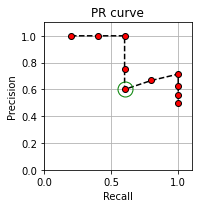

(<Figure size 216x216 with 1 Axes>,
 <AxesSubplot:title={'center':'PR curve'}, xlabel='Recall', ylabel='Precision'>)

In [21]:
plot_PR_curve(P_Q, R_Q, figsize=(3,3))

In [2]:
print("semoga jago IR")
print("AAAMIIIN")

semoga jago IR
AAAMIIIN
